In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import preprocessing
import lightgbm as lgb
from sklearn.pipeline import make_pipeline

In [4]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t')

In [5]:
train_data.head

<bound method NDFrame.head of          V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0     0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114   
1     0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114   
2     1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114   
3     0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114   
4     0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600 -0.212  0.757  0.584 -0.026  0.904   
2884  0.507  0.557  0.296  0.183  0.530 -0.237  0.749  0.584  0.537  0.904   
2885 -0.394 -0.721 -0.485  0.084  0.136  0.034  0.655  0.614 -0.818  0.904   
2886 -0.219 -0.282 -0.344 -0.049  0.449 -0.140  0.560  0.583 -0.596  0.904   
2887  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904   

      ...    V29    V30    V31   

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

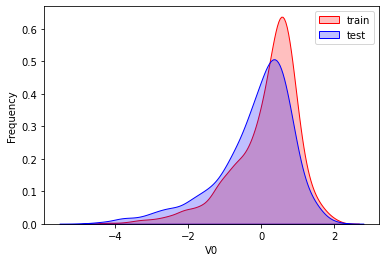

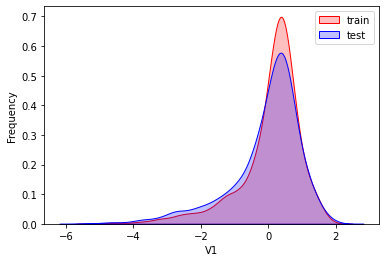

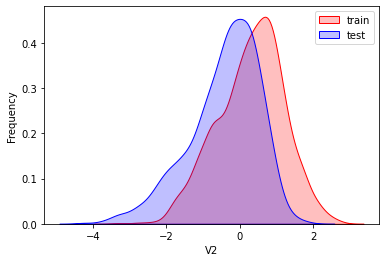

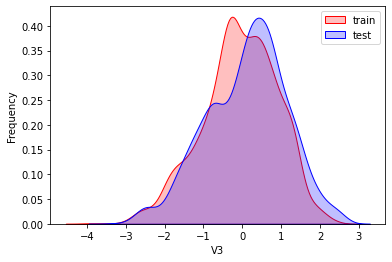

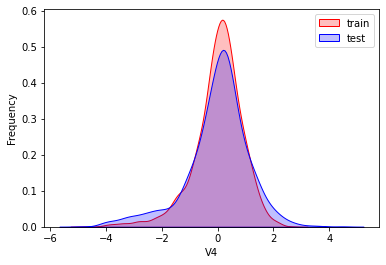

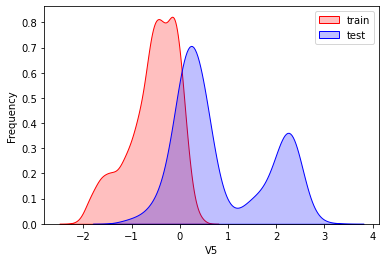

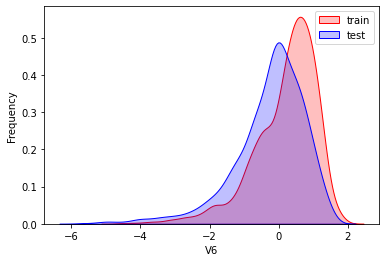

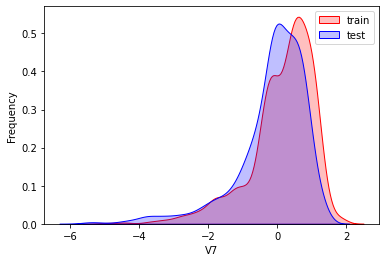

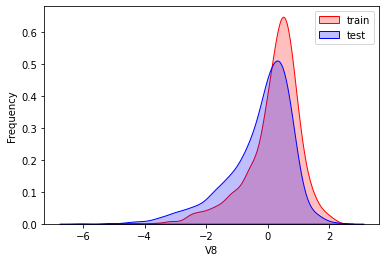

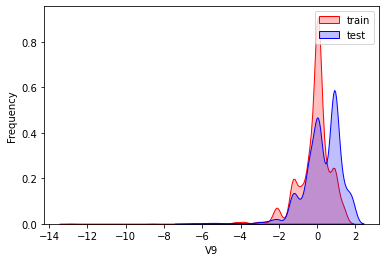

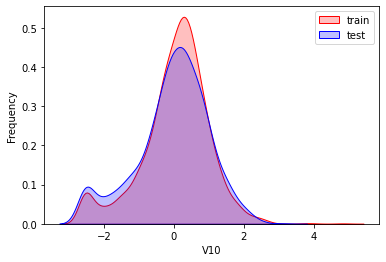

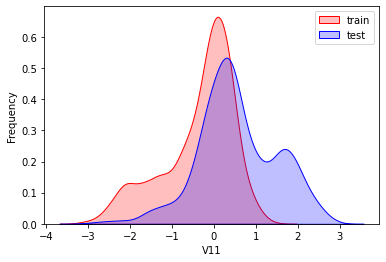

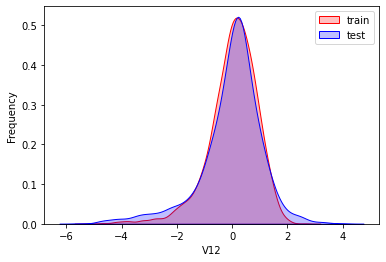

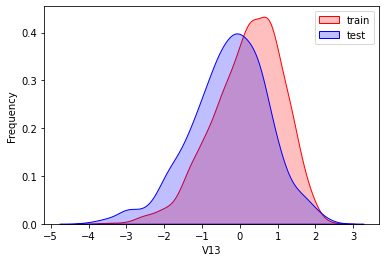

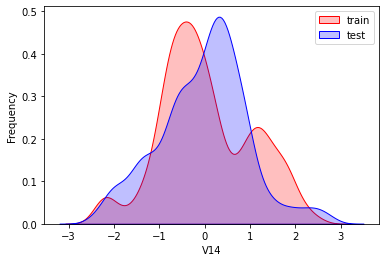

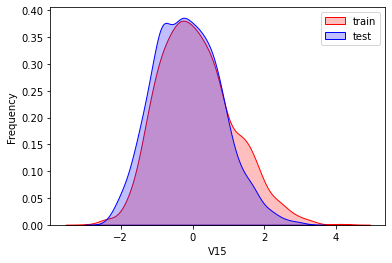

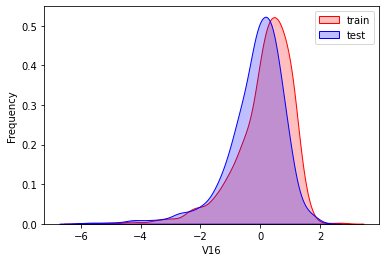

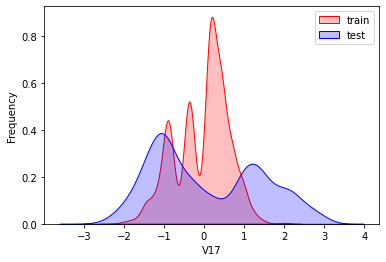

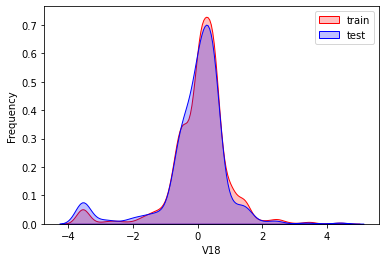

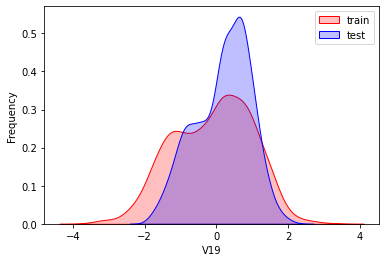

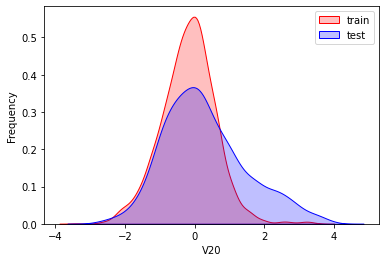

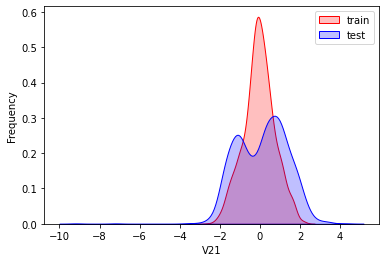

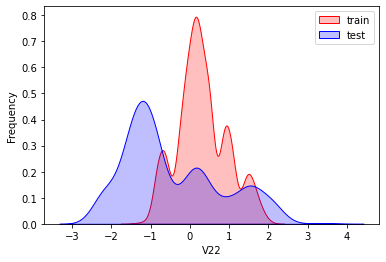

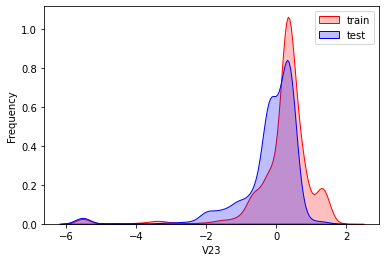

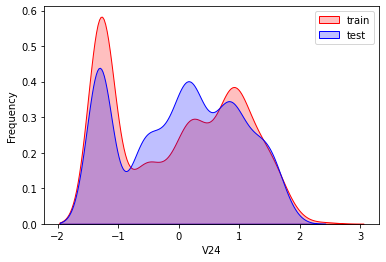

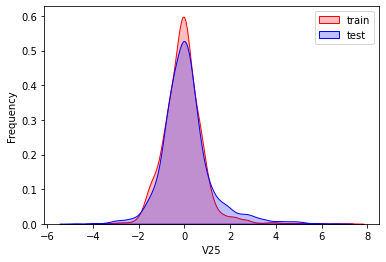

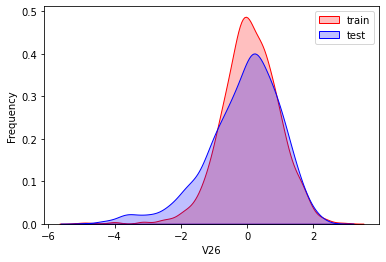

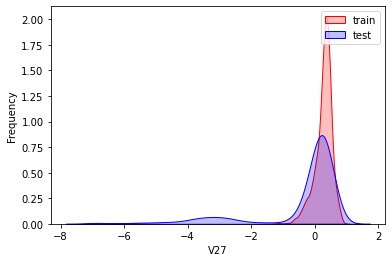

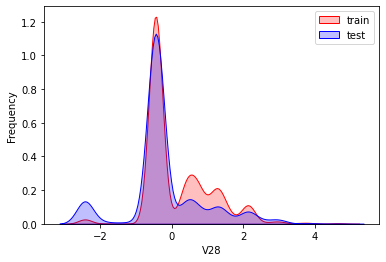

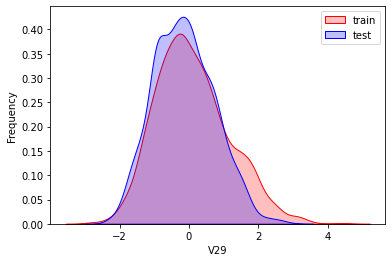

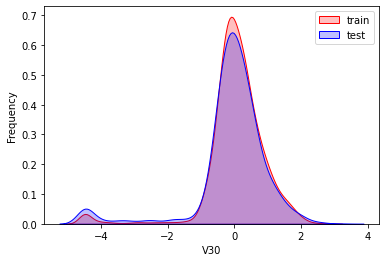

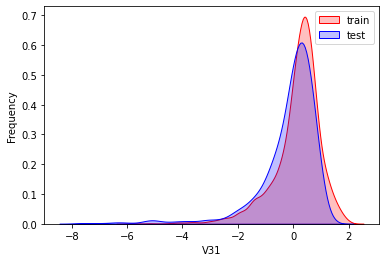

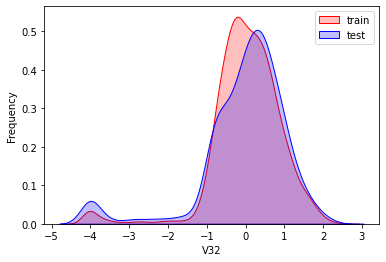

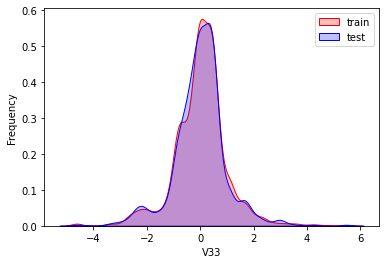

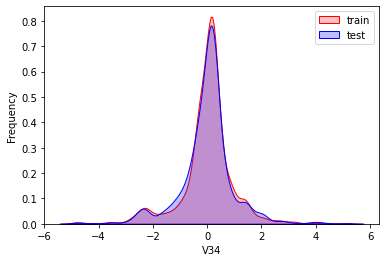

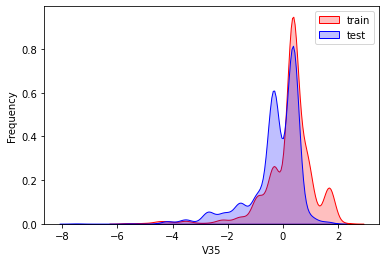

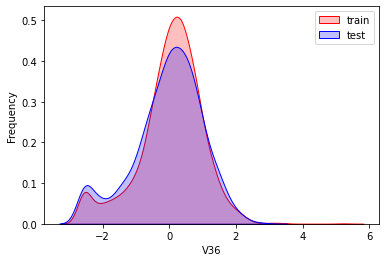

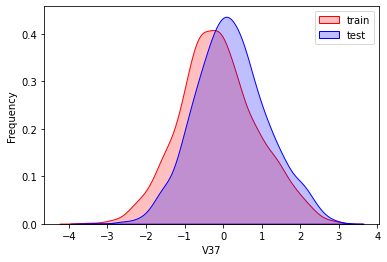

In [10]:
for column in train_data.columns[0:-1]:
    g = sns.kdeplot(train_data[column],color = "Red",shade = True)
    g = sns.kdeplot(test_data[column],color = "Blue",shade = True)
    g.set_xlabel(column)
    g.set_ylabel('Frequency')
    g.legend(["train","test"])
    plt.show()

In [19]:
drop_columns = ['V5','V9','V11','V17','V22','V35','target']

In [20]:
extact_columns = [col for col in train_data.columns if col not in drop_columns]

In [24]:
X_train = train_data[extact_columns]
Y_train = train_data['target']
X_test = test_data[extact_columns]

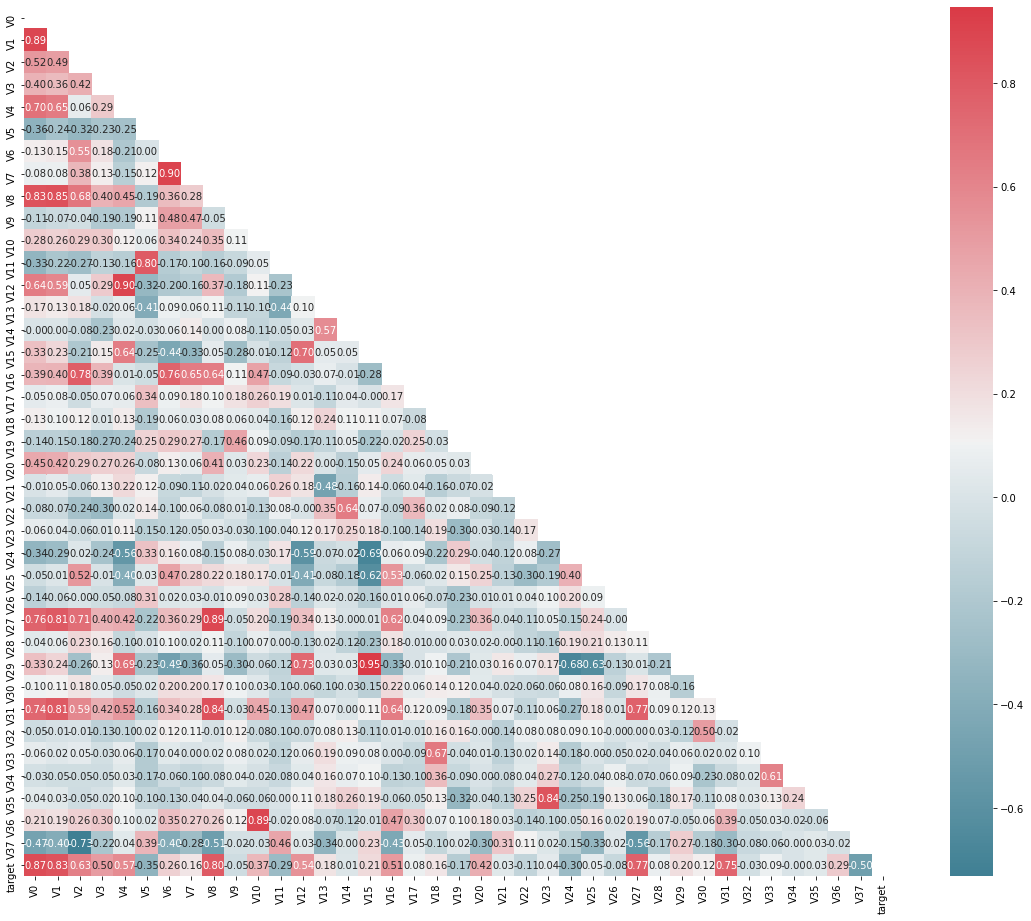

In [32]:
plt.figure(figsize = (20,16))
mcor = train_data[train_data.columns].corr(method = 'spearman')
mask = np.zeros_like(mcor)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(mcor,mask = mask,cmap = cmap,annot = True,square = True,fmt = '0.2f')
plt.show()

In [34]:
gbm = lgb.LGBMRegressor()

In [35]:
gbm.fit(X_train,Y_train)

LGBMRegressor()

In [36]:
Y_test = gbm.predict(X_test)

In [37]:
Y_test

array([ 4.53557905e-01,  2.22145721e-01, -2.27061140e-04, ...,
       -2.57266560e+00, -2.64098962e+00, -2.45163167e+00])

In [38]:
Y_test = pd.DataFrame(Y_test)

In [39]:
Y_test

,0
0,0.453558
1,0.222146
2,-0.000227
3,0.223790
4,0.313989
...,...
1920,-1.733275
1921,-2.717736
1922,-2.572666
1923,-2.640990


In [40]:
Y_test.to_csv('submit.txt',header = None,index = False)